In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:\work\AdSmartABdata.csv")
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
clean_df = data[['auction_id', 'experiment', 'yes', 'no']]
clean_df.shape

(8077, 4)

In [4]:
#We start by droping user that did not participate in the questioner.
clean_df = clean_df.query("not (yes == 0 & no == 0)")
clean_df.shape

(1243, 4)

In [5]:
#
#transform the responses into on variable
clean_df['aware'] = 0
clean_df.loc[clean_df['yes'] == 1, 'aware'] = 1
clean_df.loc[clean_df['yes'] == 0, 'aware'] = 0
clean_df.drop(columns=['yes', 'no'], inplace=True)
clean_df = clean_df.set_index('auction_id')
clean_df.head(5)

,experiment,aware
auction_id,,
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
008aafdf-deef-4482-8fec-d98e3da054da,exposed,1
00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0
00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1
00ebf4a8-060f-4b99-93ac-c62724399483,control,0


In [6]:
summary_df = clean_df.pivot_table(values='aware', index='experiment', aggfunc='sum')
summary_df['total'] = clean_df.pivot_table( values='aware', index='experiment', aggfunc='count')
summary_df['rate'] = clean_df.pivot_table(values='aware', index='experiment')
summary_df['not aware'] = summary_df['total'] - summary_df['aware']
summary_df = summary_df.reindex(['aware', 'not_aware', 'total', 'rate'], axis=1)
summary_df

,aware,not_aware,total,rate
experiment,,,,
control,264,NaN,586,0.450512
exposed,308,NaN,657,0.468798


In [7]:
e_rate = summary_df['rate']['exposed']
c_rate = summary_df['rate']['control']
dif_cr = e_rate - c_rate
dif_cr

0.018285619295484168

In [8]:
yes = pd.DataFrame(data[(data['yes']==1)]) 
no = pd.DataFrame(data[(data['no']==1)])
no['no'] = 0
data = pd.concat([yes, no]).sort_index()
data. drop(['no'], axis=1, inplace=True)
data.rename(columns = {'yes':'converted'}, inplace = True) 
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [9]:
data['experiment'] = pd.factorize(data.experiment)[0]
data['device_make'] = pd.factorize(data.device_make)[0]
data['browser'] = pd.factorize(data.browser)[0]
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,0,2020-07-05,2,0,6,0,0
16,008aafdf-deef-4482-8fec-d98e3da054da,0,2020-07-04,16,1,6,1,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,0,2020-07-06,8,1,6,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,1,2020-07-08,4,2,6,2,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,1,2020-07-03,15,1,6,1,0


In [10]:
data_total = data[['date','hour','device_make','platform_os','browser','converted']]
data_total.head()

,date,hour,device_make,platform_os,browser,converted
2,2020-07-05,2,0,6,0,0
16,2020-07-04,16,1,6,1,1
20,2020-07-06,8,1,6,1,0
23,2020-07-08,4,2,6,2,1
27,2020-07-03,15,1,6,1,0


In [11]:
data_total.isna().sum()

date           0
hour           0
device_make    0
platform_os    0
browser        0
converted      0
dtype: int64

In [12]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_total['row_id'] = data_total.index


data_total['Experiment'] = data_total['converted']

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date 
del data_total['date']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

<ipython-input-12-0f9ad193b2d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total['row_id'] = data_total.index


In [13]:
# Check the new data
data_total

,hour,device_make,platform_os,browser,converted,row_id,Experiment
6224,15,1,6,1,1,6224,1
2046,21,61,6,0,1,2046,1
356,8,17,6,2,0,356,0
3492,5,1,6,1,1,3492,1
7874,14,1,6,1,0,7874,0
...,...,...,...,...,...,...,...
1521,15,5,6,3,1,1521,1
3473,5,13,6,0,1,3473,1
3703,13,43,6,2,0,3703,0
7938,11,1,6,1,0,7938,0


In [15]:
data_total = data_total[['row_id', 'Experiment', 'device_make', 'browser', 'platform_os',]]

In [16]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'platform_os'],\
                                                    data_total['platform_os'], test_size=0.2)

In [17]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['browser'] = lb.fit_transform(X_train['browser'])
X_test['browser'] = lb.transform(X_test['browser'])

In [18]:
X_train.head()

,row_id,Experiment,device_make,browser
6851,6851,1,100,0
5929,5929,0,18,3
4516,4516,0,3,0
1019,1019,1,13,0
4985,4985,1,1,1


In [19]:
X_test.head()

,row_id,Experiment,device_make,browser
514,514,1,1,1
945,945,0,39,0
5393,5393,1,1,1
3982,3982,0,1,1
6436,6436,0,1,1


Helper functions

Function for printing the evaluation scores related to a regression problem Function for plotting the original values and values predicted by the model

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('browser')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

#Linear regression: A baseline

In [22]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [23]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [24]:
calculate_metrics(y_test, y_preds)

RMSE Score: 3.2158979008595785
R2_Squared: -867.8540638780452
MAE Score: 2.691947750260908


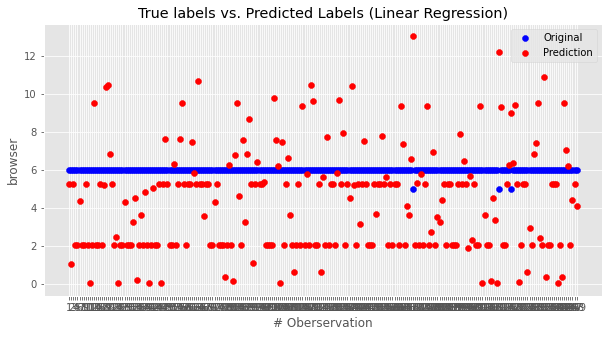

In [25]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [26]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            platform_os   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              893.9
Date:                Fri, 23 Jul 2021   Prob (F-statistic):                   2.68e-281
Time:                        11:07:48   Log-Likelihood:                         -2538.2
No. Observations:                 994   AIC:                                      5082.
Df Residuals:                     991   BIC:                                      5097.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [27]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
2,browser,1.434702e-111
0,Experiment,3.207587e-68
1,device_make,2.322192e-10


# Model 02: Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 0.026426292803967043
R2_Squared: 0.9413301716350496
MAE Score: 0.002275769745649263


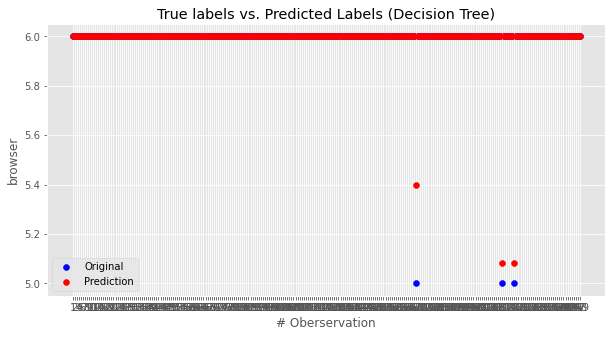

In [29]:
plot_preds(y_test, y_preds, 'Decision Tree')

In [33]:
"""
import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
"""

'\nimport StringIO  \nfrom IPython.display import Image  \nfrom sklearn.tree import export_graphviz\nimport pydotplus\n\ndot_data = StringIO()\n\nexport_graphviz(dtree, out_file=dot_data, \n                feature_names=X_train_refined.columns,\n                filled=True, rounded=True,\n                special_characters=True)\n\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \nImage(graph.create_png())\n'

# Model 03: XGBoost

In [34]:
!pip install xgboost

In [35]:
import xgboost as xgb

In [36]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [37]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [38]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

[11:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "gamma", "max_depth", "n_estimators", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [39]:
calculate_metrics(y_test, y_preds)

RMSE Score: 1.3622432414770425
R2_Squared: -154.90198908067956
MAE Score: 1.1240009696608089


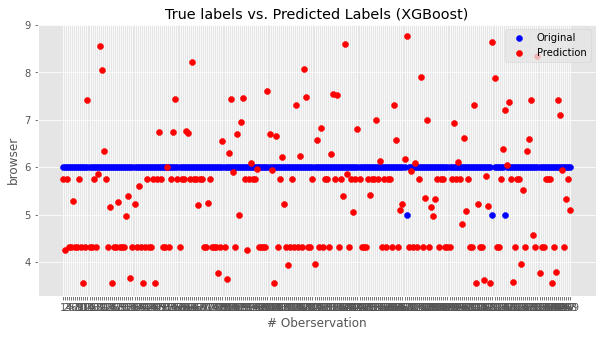

In [40]:
plot_preds(y_test, y_preds, 'XGBoost')